In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [3]:
df=pd.read_csv(r"C:\Users\Sahil\OneDrive\Documents\IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
len(df)

50000

In [6]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [7]:
import nltk

In [8]:
df['num_chr']=df['review'].apply(len)

In [9]:
df.head()

,review,sentiment,num_chr
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [10]:
import re

In [11]:
def remove_tag(raw_text):
  cleaned_text = re.sub(re.compile('<.*?>'),'',raw_text)
  return cleaned_text

In [12]:
df['review'] = df['review'].apply(remove_tag)

In [14]:
df['num_words']=df['review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [15]:
df.head()

,review,sentiment,num_chr,num_words
0,One of the other reviewers has mentioned that ...,positive,1761,353
1,A wonderful little production. The filming tec...,positive,998,177
2,I thought this was a wonderful way to spend ti...,positive,926,187
3,Basically there's a family where a little boy ...,negative,748,148
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,248


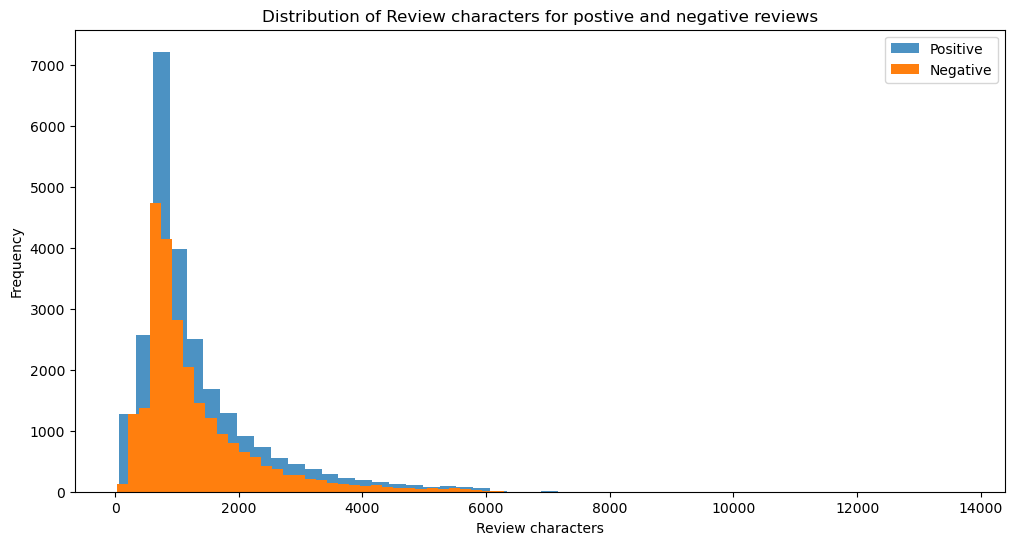

In [16]:
plt.figure(figsize=(12, 6))
plt.hist (df[df['sentiment'] == 'positive']['num_chr'], bins=(50), alpha=0.8, label='Positive')
plt.hist(df[df['sentiment'] == 'negative']['num_chr'], bins=50, alpha=1, label='Negative')
plt.xlabel('Review characters')
plt.ylabel('Frequency')
plt.title('Distribution of Review characters for postive and negative reviews')
plt.legend()
plt.show()

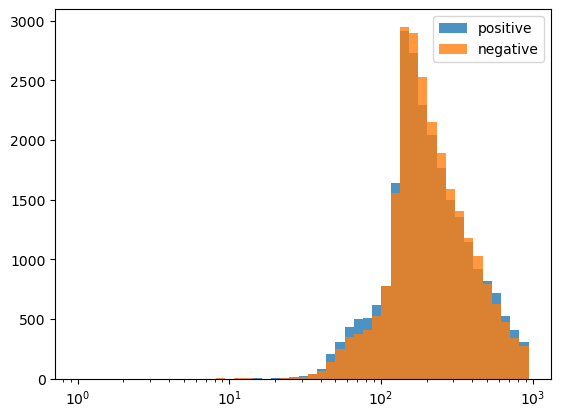

In [17]:
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0, 50))
plt.hist(df[df['sentiment'] == 'positive']['num_words'] , bins= bins , alpha=0.8)
plt.hist(df[df['sentiment'] == 'negative']['num_words'] , bins= bins , alpha=0.8)
plt.legend(['positive' , 'negative'])
plt.show()

In [18]:
x_train , x_test , y_train , y_test = train_test_split(df[['review' , 'num_words']] , df['sentiment'] , test_size=0.3 , random_state=3)

In [19]:
print("shape of train : ",x_train.shape)
print("shape of test : ",x_test.shape)

shape of train :  (35000, 2)
shape of test :  (15000, 2)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['review'])

x_train, x_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.3, random_state=3)

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pre = lr.predict(x_test)

In [22]:
model_score = lr.score(x_test, y_test)
print(model_score)

0.8904666666666666


In [25]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pre))

[[6550  880]
 [ 763 6807]]


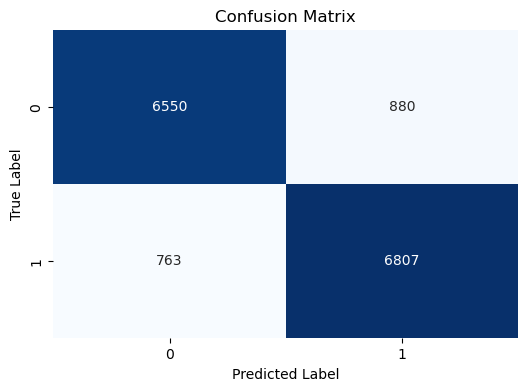

In [26]:

cm = metrics.confusion_matrix(y_test, y_pre)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
print(metrics.classification_report(y_test, y_pre))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7430
    positive       0.89      0.90      0.89      7570

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [28]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [29]:
def model(m):
  model = model

In [30]:
preduction = nb.predict(x_test)
print(metrics.confusion_matrix(y_test, preduction))


[[6304 1126]
 [1127 6443]]


In [31]:
model_score = nb.score(x_test, y_test)
print(model_score)

0.8498


In [32]:
print(metrics.classification_report(y_test, preduction))

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      7430
    positive       0.85      0.85      0.85      7570

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

